In [1]:
from firedrake import *
from firedrake.pyplot import *
import matplotlib.pyplot as plt

## Mesh tests

### Subdomains extraction

Cruciale utilizzare mesh.init() per estrarre i subdomains! Questo comando completa l'inizializzazione della mesh che a volte (per motivi misteriosi) non è completa nel constructor.

Nota che:
1. mesh è un oggetto della classe 'MeshGeometry'
2. mesh.topology è un oggetto della classe 'MeshTopology'
3. 'plasma = SubDomainData(psi > psi0)' crea un nuovo subdomain basato su un'espressione boolean UFL expression! utile x plasma subdomain!!

In [2]:
mesh = Mesh("../meshes/ITER.msh", dim = 2, distribution_parameters={"partition": False}, reorder = True)
display(type(mesh))
display(type(mesh.topology))

firedrake.mesh.MeshGeometry

firedrake.mesh.MeshTopology

In [3]:
print(f'Number of cells: {mesh.topology.num_cells()}')
print(f'Number of edges: {mesh.topology.num_edges()}')
print(f'Number of 2D entities: {mesh.topology.num_entities(2)}')
print(f'Number of 1D entities: {mesh.topology.num_entities(1)}')

Number of cells: 27988
Number of edges: 41999
Number of 2D entities: 27988
Number of 1D entities: 41999


In [4]:
top = mesh.topology
top.cell_subset(subdomain_id=13) # subdomain 13 = vacuum wall region

AttributeError: 'MeshTopology' object has no attribute '_cell_numbering'

In [5]:
mesh.init()
new_top = mesh.topology
new_top.cell_subset(13)

Subset(Set((27988, 27988, 27988), 'Cells'), array([ 7156,  7157,  7159, ..., 27948, 27961, 27962], dtype=int32))

### Mesh refinment from Firedrake

In [9]:
mesh = Mesh("../meshes/ITER.msh", dim = 2, distribution_parameters={"partition": False}, reorder = True)
mesh.init()

In [ ]:
#hier =  MeshHierarchy(mesh, 3)

In [ ]:
display(type(hier))
display(type(hier.meshes))
display(len(hier.meshes))
display(type(hier.meshes[0]))

firedrake.mg.mesh.HierarchyBase

tuple

4

firedrake.mesh.MeshGeometry

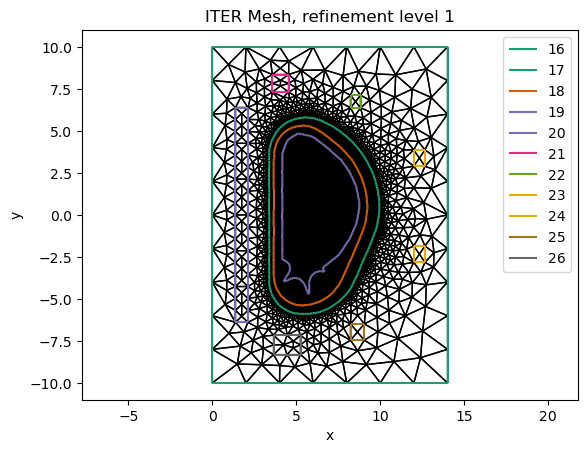

In [18]:
# Display the first mesh:
#mesh1 = hier.meshes[0]
mesh1 = mesh
fig, ax = plt.subplots()
triplot(mesh1, axes=ax)
plt.title(r"ITER Mesh, refinement level 1")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.legend()
plt.show()

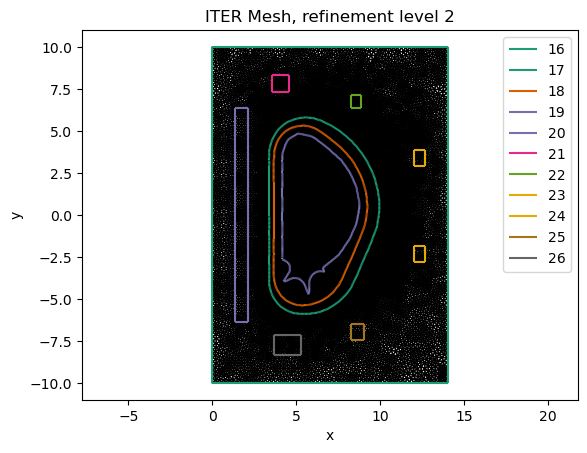

In [ ]:
# Display the second mesh:
mesh2 = hier.meshes[1]
fig, ax = plt.subplots()
triplot(mesh2, axes=ax)
plt.title(r"ITER Mesh, refinement level 2")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.legend()
plt.show()

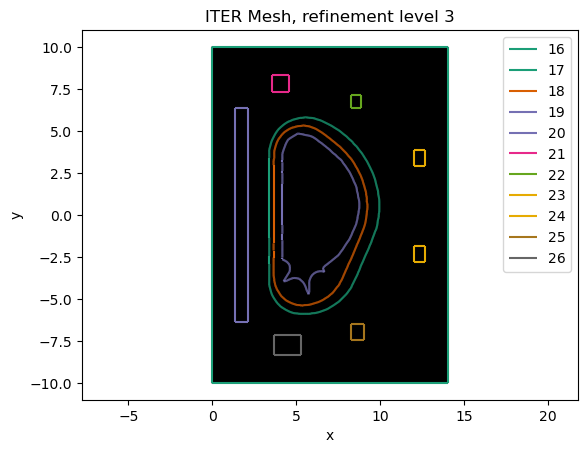

In [ ]:
# Display the third mesh:
mesh3 = hier.meshes[2]
fig, ax = plt.subplots()
triplot(mesh3, axes=ax)
plt.title(r"ITER Mesh, refinement level 3")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.legend()
plt.show()

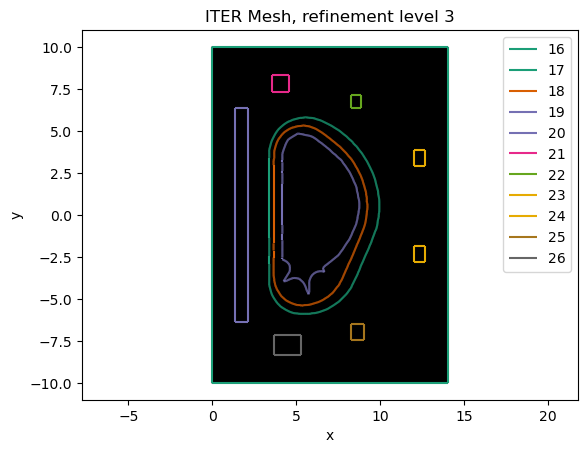

In [ ]:
# Display the third mesh:
mesh4 = hier.meshes[3]
fig, ax = plt.subplots()
triplot(mesh3, axes=ax)
plt.title(r"ITER Mesh, refinement level 3")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.legend()
plt.show()

In [17]:
print('MESH 1:')
print(f'Number of cells: {mesh1.topology.num_cells()}')
print(f'Number of edges: {mesh1.topology.num_edges()}')
print(f'h_min: {mesh1.cell_sizes.dat.data.min()}')
print(f'h_max: {mesh1.cell_sizes.dat.data.max()}')
'''
print('\nMESH 2:')
print(f'Number of cells: {mesh2.topology.num_cells()}')
print(f'Number of edges: {mesh2.topology.num_edges()}')
print(f'h_min: {mesh2.cell_sizes.dat.data.min()}')
print(f'h_max: {mesh2.cell_sizes.dat.data.max()}')

print('\nMESH 3:')
print(f'Number of cells: {mesh3.topology.num_cells()}')
print(f'Number of edges: {mesh3.topology.num_edges()}')
print(f'h_min: {mesh3.cell_sizes.dat.data.min()}')
print(f'h_max: {mesh3.cell_sizes.dat.data.max()}')

print('\nMESH 4:')
print(f'Number of cells: {mesh4.topology.num_cells()}')
print(f'Number of edges: {mesh4.topology.num_edges()}')
print(f'h_min: {mesh4.cell_sizes.dat.data.min()}')
print(f'h_max: {mesh4.cell_sizes.dat.data.max()}')
'''

MESH 1:
Number of cells: 11156
Number of edges: 16751
h_min: 0.05032310990908786
h_max: 2.384799891387313


"\nprint('\nMESH 2:')\nprint(f'Number of cells: {mesh2.topology.num_cells()}')\nprint(f'Number of edges: {mesh2.topology.num_edges()}')\nprint(f'h_min: {mesh2.cell_sizes.dat.data.min()}')\nprint(f'h_max: {mesh2.cell_sizes.dat.data.max()}')\n\nprint('\nMESH 3:')\nprint(f'Number of cells: {mesh3.topology.num_cells()}')\nprint(f'Number of edges: {mesh3.topology.num_edges()}')\nprint(f'h_min: {mesh3.cell_sizes.dat.data.min()}')\nprint(f'h_max: {mesh3.cell_sizes.dat.data.max()}')\n\nprint('\nMESH 4:')\nprint(f'Number of cells: {mesh4.topology.num_cells()}')\nprint(f'Number of edges: {mesh4.topology.num_edges()}')\nprint(f'h_min: {mesh4.cell_sizes.dat.data.min()}')\nprint(f'h_max: {mesh4.cell_sizes.dat.data.max()}')\n"

In [ ]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath("../"))

# Import GradShafranovSolver from the solver module
from solver import GradShafranovSolver

In [ ]:
def j(R, psi_norm):
    r0 = 6.2
    alpha = 2.0
    beta = 0.5978
    gamma = 1.395
    lambda_ = 1.365461e6
    return lambda_ * (beta * R / r0 + (1 - beta) * r0 / R) * (1 - psi_norm**alpha) ** gamma

In [ ]:
params = {
    "geometry": "ITER",
    "I": [-6.705e5, 1.373e4, 2.133e6, 1.432e6, -3.774e5, -6.172e5, -1.885e6, -2.359e6, -2.124e6, -1.836e6, -3.491e6, -2.04e6],
    "j_cv": 0,                # Vessel wall current density
    "function_space_family": "P",
    "function_space_degree": 2,
    "max_iterations": 1000,
    "tolerance": 1e-4,
    "verbose": True,
    "G": j,
    "algorithm": "Picard",
}

In [ ]:
# Modificare path in metodo "build_mesh": rimpiazza . con .. !!
solver = GradShafranovSolver(params)

# Set mesh4 as mesh:
solver.Mesh = mesh4
solver.function_spaces()

# Solve with the finest mesh:
solver.solve()
solver.plot_flux()


Loading mesh for geometry 'ITER'...


FileNotFoundError: Mesh file ./meshes/ITER.msh does not exist.

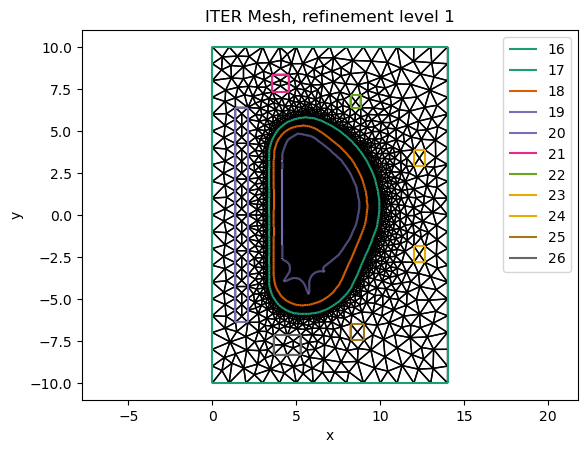

Number of cells: 889292
Number of edges: 1333972
h_min: 0.004939002799222266
h_max: 1.4208454206088375


In [27]:
mesh = Mesh("../meshes/ITER_convergence/ITER5.msh", dim = 2, distribution_parameters={"partition": False}, reorder = True)
mesh.init()
fig, ax = plt.subplots()
triplot(mesh, axes=ax)
plt.title(r"ITER Mesh, refinement level 1")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.legend()
plt.show()

print(f'Number of cells: {mesh.topology.num_cells()}')
print(f'Number of edges: {mesh.topology.num_edges()}')
print(f'h_min: {mesh.cell_sizes.dat.data.min()}')
print(f'h_max: {mesh.cell_sizes.dat.data.max()}')